Hypothetical Document Embeddings(HyDE)

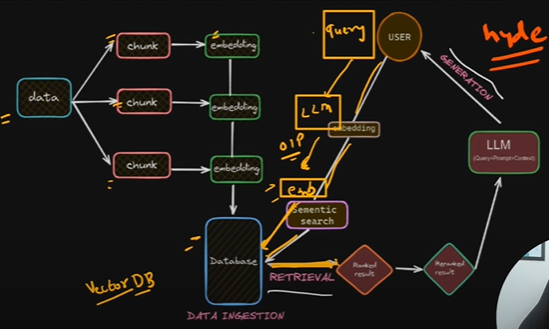

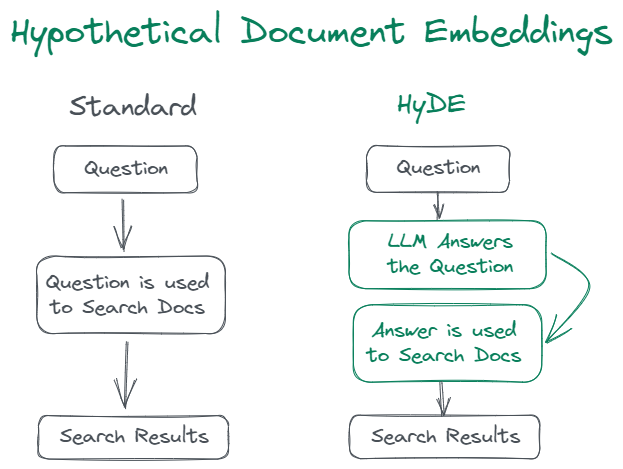

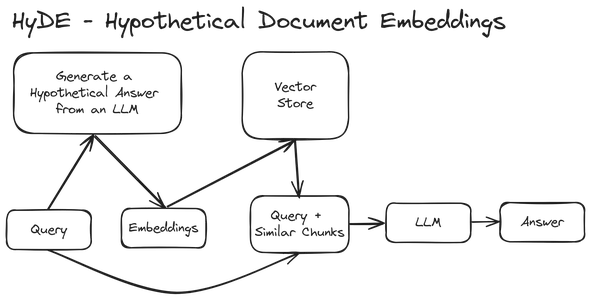

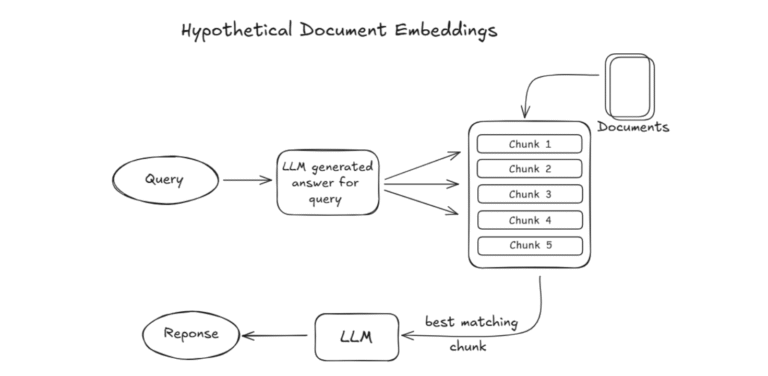

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY = os.getenv('GEMINI_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [2]:
from langchain_community.document_loaders import WebBaseLoader

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
loader = WebBaseLoader("https://medium.com/prompt-engineering/hyde-revolutionising-search-with-hypothetical-document-embeddings-3474df795af8")

In [4]:
docs = loader.load()

In [5]:
docs

[Document(metadata={'source': 'https://medium.com/prompt-engineering/hyde-revolutionising-search-with-hypothetical-document-embeddings-3474df795af8', 'title': 'HYDE: Revolutionising Search with Hypothetical Document Embeddings | by Mark Craddock | Prompt Engineering | Medium', 'description': 'With the rise of AI technologies, the landscape of search mechanisms is undergoing a paradigm shift. Tools such as the OpenAI Embeddings API have ushered in a new era where traditional keyword-based…', 'language': 'en'}, page_content='HYDE: Revolutionising Search with Hypothetical Document Embeddings | by Mark Craddock | Prompt Engineering | MediumOpen in appSign upSign inWriteSign upSign inHYDE: Revolutionising Search with Hypothetical Document EmbeddingsMark Craddock·FollowPublished inPrompt Engineering·2 min read·Oct 28, 2023--3ListenShareWith the rise of AI technologies, the landscape of search mechanisms is undergoing a paradigm shift. Tools such as the OpenAI Embeddings API have ushered in a

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [8]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=50)

In [9]:
splits = text_splitter.split_documents(docs)

In [10]:
splits

[Document(metadata={'source': 'https://medium.com/prompt-engineering/hyde-revolutionising-search-with-hypothetical-document-embeddings-3474df795af8', 'title': 'HYDE: Revolutionising Search with Hypothetical Document Embeddings | by Mark Craddock | Prompt Engineering | Medium', 'description': 'With the rise of AI technologies, the landscape of search mechanisms is undergoing a paradigm shift. Tools such as the OpenAI Embeddings API have ushered in a new era where traditional keyword-based…', 'language': 'en'}, page_content='HYDE: Revolutionising Search with Hypothetical Document Embeddings | by Mark Craddock | Prompt Engineering | MediumOpen in appSign upSign inWriteSign upSign inHYDE: Revolutionising Search with Hypothetical Document EmbeddingsMark Craddock·FollowPublished inPrompt Engineering·2 min read·Oct 28,'),
 Document(metadata={'source': 'https://medium.com/prompt-engineering/hyde-revolutionising-search-with-hypothetical-document-embeddings-3474df795af8', 'title': 'HYDE: Revolut

In [11]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [12]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [13]:
from langchain_community.vectorstores import Chroma

In [14]:
vectorstores = Chroma.from_documents(documents=splits,
                                     collection_name = 'my-collection',
                                     embedding=embeddings)

In [15]:
vectorstores # inmemory

In [16]:
retriever = vectorstores.as_retriever(search_type="similarity", search_kwargs= {'k':4})

create hyde

In [17]:
from langchain.prompts import ChatPromptTemplate

In [18]:
template = """For the given question try to generate a hypothetical answer\
    only generate the answer nothing else:
    Question: {question}

"""

In [19]:
prompt = ChatPromptTemplate.from_template(template)

In [25]:
query = prompt.format(question='what is  hypothetical document embedding ?')

In [21]:
from langchain_google_genai import GoogleGenerativeAI

In [22]:
llm = GoogleGenerativeAI(model="gemini-pro")

In [26]:
hypothetical_answer = llm.invoke(query)

In [27]:
hypothetical_answer

'A hypothetical document embedding is a mathematical representation of a document that captures its semantic content and structure.'

In [28]:
similar_docs = retriever.get_relevant_documents(hypothetical_answer)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15732\1196132916.py:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  similar_docs = retriever.get_relevant_documents(hypothetical_answer)


In [29]:
similar_docs

[Document(metadata={'description': 'With the rise of AI technologies, the landscape of search mechanisms is undergoing a paradigm shift. Tools such as the OpenAI Embeddings API have ushered in a new era where traditional keyword-based…', 'language': 'en', 'source': 'https://medium.com/prompt-engineering/hyde-revolutionising-search-with-hypothetical-document-embeddings-3474df795af8', 'title': 'HYDE: Revolutionising Search with Hypothetical Document Embeddings | by Mark Craddock | Prompt Engineering | Medium'}, page_content='hundreds or even thousands of dimensions, these vectors capture the essence and intent of the text, allowing for more accurate and context-aware search results.Enter Hypothetical Document Embeddings (HyDE), an innovative approach detailed in the paper titled Precise Zero-Shot Dense Retrieval'),
 Document(metadata={'description': 'With the rise of AI technologies, the landscape of search mechanisms is undergoing a paradigm shift. Tools such as the OpenAI Embeddings AP

In [31]:
for doc in similar_docs:
    print(doc.page_content)
    print()

hundreds or even thousands of dimensions, these vectors capture the essence and intent of the text, allowing for more accurate and context-aware search results.Enter Hypothetical Document Embeddings (HyDE), an innovative approach detailed in the paper titled Precise Zero-Shot Dense Retrieval

HYDE: Revolutionising Search with Hypothetical Document Embeddings | by Mark Craddock | Prompt Engineering | MediumOpen in appSign upSign inWriteSign upSign inHYDE: Revolutionising Search with Hypothetical Document EmbeddingsMark Craddock·FollowPublished inPrompt Engineering·2 min read·Oct 28,

another AI-powered model steps in to convert the synthesised document into an embedding vector. This vector then becomes the key to identifying and retrieving documents that align with the content and intent of the AI-generated document.Implications of HyDE:The introduction of HyDE promises several

paper titled Precise Zero-Shot Dense Retrieval without Relevance Labels. The core hypothesis of HyDE is simpl

In [32]:
template = """Answer the  following questions in details based on this context:
{context}

Question: {question}
Answer:
"""

In [33]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [35]:
formatted_docs1 = format_docs(similar_docs)

In [37]:
formatted_docs1

'hundreds or even thousands of dimensions, these vectors capture the essence and intent of the text, allowing for more accurate and context-aware search results.Enter Hypothetical Document Embeddings (HyDE), an innovative approach detailed in the paper titled Precise Zero-Shot Dense Retrieval\n\nHYDE: Revolutionising Search with Hypothetical Document Embeddings | by Mark Craddock | Prompt Engineering | MediumOpen in appSign upSign inWriteSign upSign inHYDE: Revolutionising Search with Hypothetical Document EmbeddingsMark Craddock·FollowPublished inPrompt Engineering·2 min read·Oct 28,\n\nanother AI-powered model steps in to convert the synthesised document into an embedding vector. This vector then becomes the key to identifying and retrieving documents that align with the content and intent of the AI-generated document.Implications of HyDE:The introduction of HyDE promises several\n\npaper titled Precise Zero-Shot Dense Retrieval without Relevance Labels. The core hypothesis of HyDE i

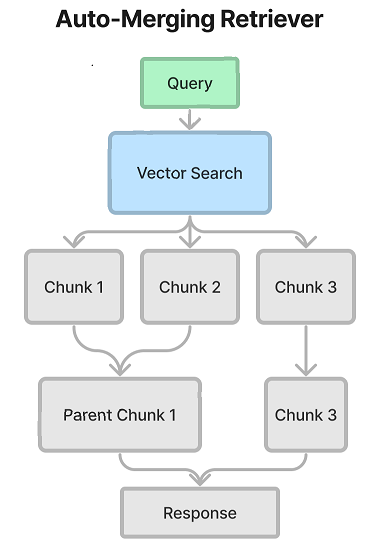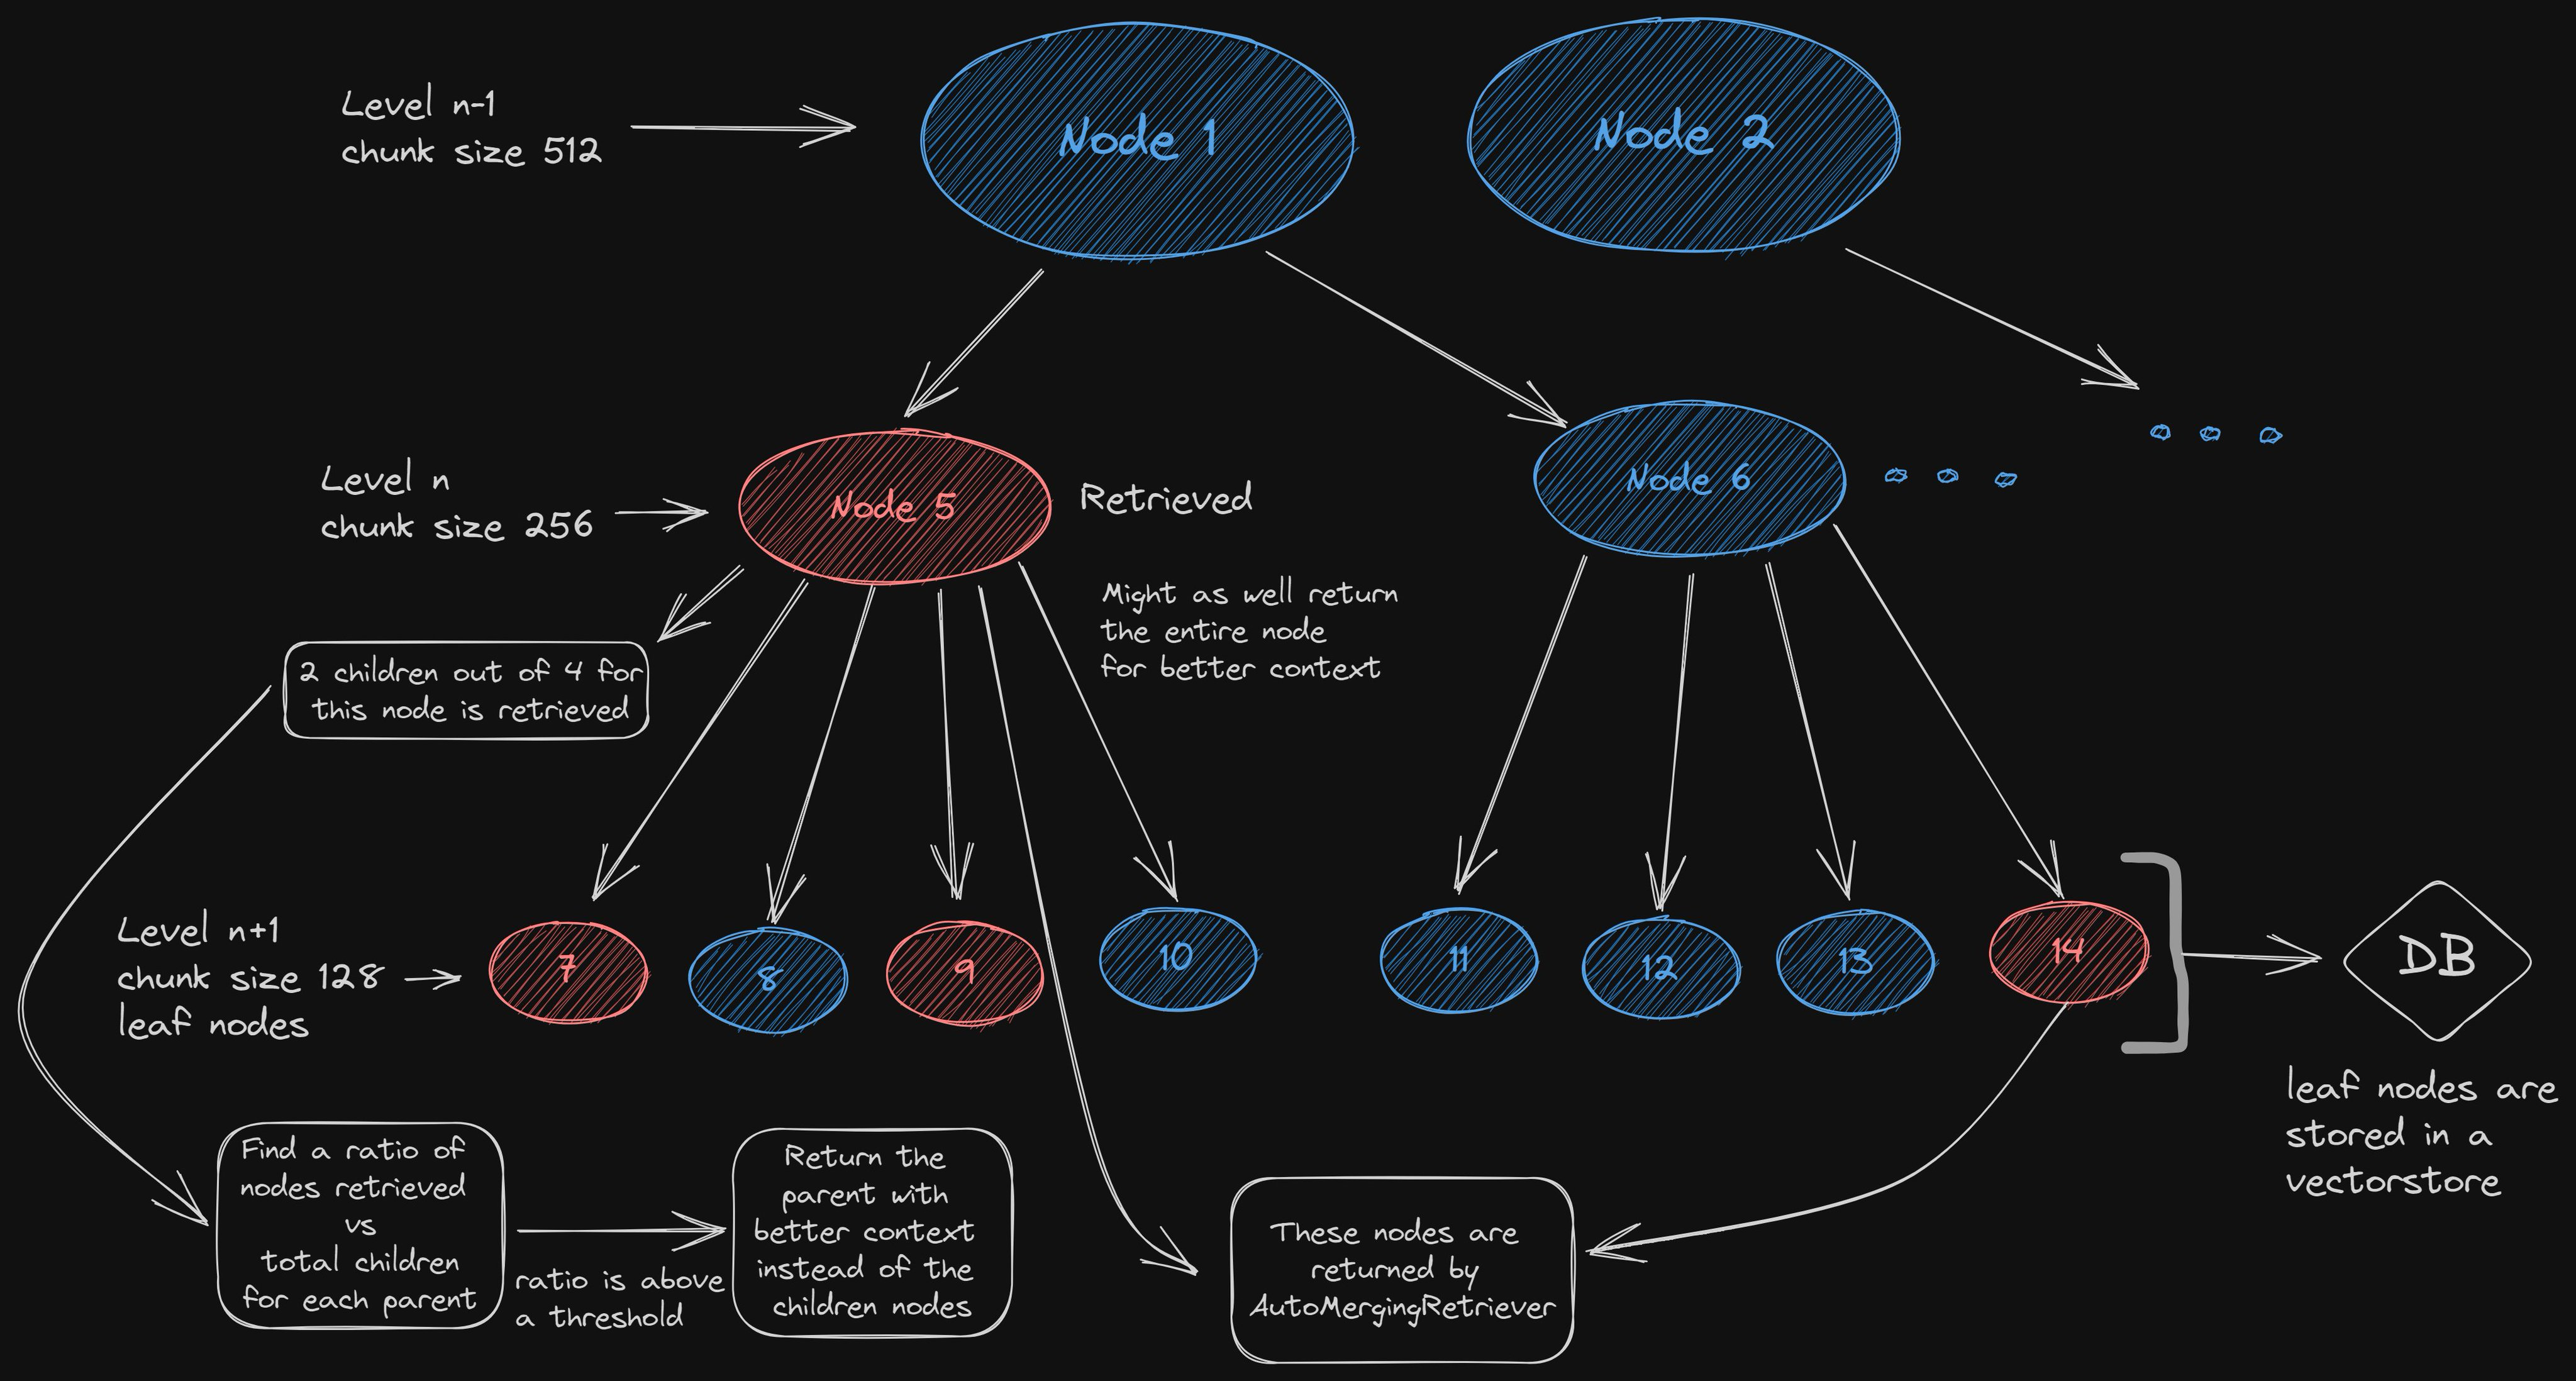

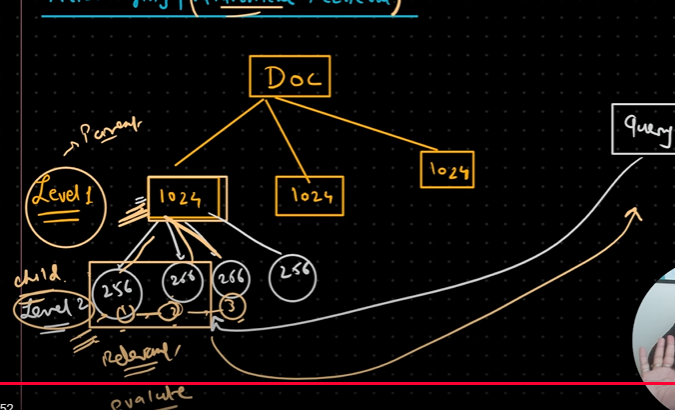